In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange,seed
%matplotlib inline

## Simple Linear Regression



Simple Linear Regression Formula:

$$ Y = B_0 + B_1X $$

Y = Response

X = Feature

$ B_0 , B_1 $ = model coefficients

We must 'learn' the values of the coefficients in order to create our model. Once we learn the coefficients, we can use the model to predict $Y$

The formula for $B_0$ is :
$$\hat{B_0} = \bar{y} - \hat{B_1} \bar{x}$$

The formula for $B_1$ is :
$$\hat{B_1} = \frac{\sum_{i=1}^n (x_i-\bar{x}) * (y_i - \bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$


#### Mean and Variance

First, I need to estimate the mean and the variance of the dependent and independent variables

$$mean(x)= \frac{\sum_{i=1} x_i}{count(x)}$$

In [2]:
"""
A function that calculates the mean of a list of numbers
"""
def mean(values):
    x = sum(values)/float(len(values))
    return x

The variance is the sum square differences for each value from the mean value.

$$variance = \sum_{i=1}^{n} (x_i-mean(x))^2 $$

In [3]:
"""
A function that calculates the variance of a list of numbers.

Args:
    values: list of numbers
    mean: takes the mean calculation
    
Returns:
    x: the variance which is the sum square differences for each value from the mean value
"""
def variance(values, mean):
    x = sum([(x-mean)**2 for x in values])
    return x

Creating the data

In [4]:
x = list(range(1,15))
y = [1,2,4,6,5,8,7.9,8.6,9.5,9,11,12.5,13,13.5]
data = zip(x,y)
print data # 14 datapoints

[(1, 1), (2, 2), (3, 4), (4, 6), (5, 5), (6, 8), (7, 7.9), (8, 8.6), (9, 9.5), (10, 9), (11, 11), (12, 12.5), (13, 13), (14, 13.5)]


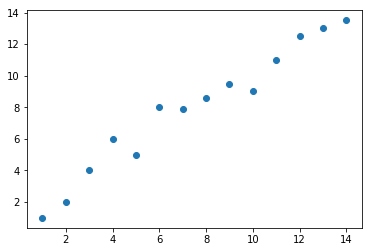

In [5]:
plt.scatter(x,y);

Print the mean and variance of x and y

In [6]:
x = [row[0] for row in data]
y = [row[1] for row in data]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x,mean_x), variance(y,mean_y)
print 'x stats: mean={:.3f} variance={:.3f} | y stats: mean={:.3f} variance={:.3f} '.format(mean_x,var_x,mean_y,var_y)

x stats: mean=7.500 variance=227.500 | y stats: mean=7.929 variance=202.049 


#### Covariance

Covariance is a measure of how much 2 groups vary together. It is quite similar to variance, but where variance tells you how a single group varies, covariance tells you how 2 groups vary together.

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers. Covariance can describe the relationship between 2 or more groups of numbers. Covariance can be normalized to produce the correlation value.

$$covariance(x,y) = \sum_{i=1}^{n} (x_i-mean(x)) * (y_i - mean(y)) $$

In [7]:
"""
A function that calculates the variance of a list of numbers.

Args:
    values: list of numbers
    mean: takes the mean calculation
    
Returns:
    x: the sum square differences for each value from the mean value
"""
def covariance(x, mean_x, y, mean_y):
    c = 0
    for i in range (len(x)):
        c += (x[i] - mean_x) * (y[i] - mean_y)
    return c

In [8]:
print x,y
print mean_x, mean_y
cov = covariance (x, mean_x, y, mean_y)

print 'Covariance={:.3f}'.format(cov)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [1, 2, 4, 6, 5, 8, 7.9, 8.6, 9.5, 9, 11, 12.5, 13, 13.5]
7.5 7.92857142857
Covariance=210.100


#### Estimating the Coefficients

It's time to estimate the 2 coefficients (B0 and B1) in simple linear regression. 

The formula for B1 is:
$$B1 = \frac{\sum_{i=1}^n (x_i-mean(x)) * (y_i - mean(y))}{\sum_{i=1}^n(x_i-mean(x))^2}$$
which is simply..
$$B1 = \frac{covariance(x,y)}{variance(x)}$$

The formula for B0 is:
$$B0 = mean(y) - B1 * mean(x)$$

In [9]:
"""
A function that seperates the dataset into individual lists of x and y and uses the mean, variance and covariance
functions to calculate the coefficients b0 and b1
"""
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean)/ variance(x, x_mean)
    bO = y_mean - b1 * x_mean
    return bO, b1

In [10]:
BO, B1 = coefficients(data)
print 'Coefficients - B0={:.3f}, B1={:.3f}'.format(BO,B1)

Coefficients - B0=1.002, B1=0.924


#### Train Test Split

Before making the predictions, I need to create a train test split function

The train and split is a resampling method used to seperate a dataset into 2 parts (train & test). The training set is used by the machine learning algorithm to train the model.

In [11]:
"""
A functions that splits the data into train and test lists
"""

def train_test_split(dataset, split ):  #
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy)) # pull a random number from data_copy
        train.append(dataset_copy.pop(index)) # pop removes the index from data_copy and appends the data to train
    return train, dataset_copy

In [12]:
m = [2,3,2,4,3,2]
l = [1,4,2,3,4,4]
ml=zip(m,l)
train_test_split(ml, split=.5)

([(2, 1), (2, 4), (3, 4)], [(3, 4), (2, 2), (4, 3)])

#### Make Predictions

Now that I know the coefficients, I can use them to make predictions
This is the formula to make predictions in a simple linear regression:

$$ y = b_0 + b_1*x $$

The following function implements the prediction equation to make predictions on a test dataset. It implement the coefficient function on the training data. The coefficients from the training data are used to make predictions on the test data.

In [13]:
"""
A function that implements the simple linear regression formula to predict the test dataset
"""
def simple_LR(train, test):
    predictions = list()
    bO, b1 = coefficients(train)
    for row in test:
        predict_y = bO + b1 * row[0]
        predictions.append(predict_y)
    return predictions

#### Evaluation
In order to evaluate the model, I'll use the root mean squared error.

It is the square root of the mean of the square of all of the error.

The use of RMSE is very common and it makes an excellent general purpose error metric for numerical predictions.

Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors.

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i}})^2 $$

                                                Low RMSE indicates a good fit

In [14]:
"""
A function that calculates the square root of the mean of the squared differences between actual outcomes and predictions
"""
def rmse(actual, predicted):
    sum_err = 0.0
    actual_len = len(actual)
    for i in range(actual_len):
        prediction_err = actual[i] - predicted[i]
        sum_err += (prediction_err ** 2)
    mean_error = sum_err / float(actual_len)
    return sqrt(mean_error)

Now I'll tie everything together with the following function

In [15]:
"""
A function that evaluates the dataset using the functions simple_LR and train_test_split and rmse
"""
def eval_alg(dataset, algorithm, split=.7,*args):  # split is set at .70 as default
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None  # for each row replace y with None
        test_set.append(row_copy) # append each row to test_set
    predicted = algorithm(train, test_set, *args) # run simple_LR function
    actual = [row[-1] for row in test] # takes every Y from the list
    rootrmse = rmse(actual, predicted) # run rmse function 
    return rootrmse

The last piece of code prints the root mean square error metric

In [16]:
seed(3)
rmse_metric = eval_alg(data, simple_LR, split=.60) # using .60 for training size
print 'Root Mean Square Error={}'.format(rmse_metric)

Root Mean Square Error=0.417102890776


**For part 2 I'll use this code on a dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html).**